In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Data Processing

In [4]:
user_info = pd.read_csv('user_info.csv', encoding='utf-8')
user_log = pd.read_csv('user_log.csv', encoding='utf-8')

In [5]:
user_info

,user_id,age,sex,phone,job,carrier,marital_status
0,376517,44.0,gentle,******6654,Thực tập sinh giáo dục,other,Married
1,234512,39.0,lady,NaN,NaN,vietnamobile,Married
2,344532,39.0,she,******6296,DevOps Engineer,other,cưới
3,186135,37.0,she,******1502,Thực tập sinh giáo dục,vietnamobile,cưới
4,30230,38.0,female,******4966,DevOps Engineer,viettel,Married
...,...,...,...,...,...,...,...
424165,395814,26.0,gеntle,******8563,Kiến trúc sư phần mềm,vinaphone,Married
424166,245950,NaN,male,*****3449,Tư vấn khách hàng,other,Divorced
424167,208016,NaN,unknown,******7187,Trưởng phòng kinh doanh,viettel,Married
424168,272535,45.0,M,*******0404,Dược sĩ,vinaphone,cưới


In [6]:
user_info['sex'].unique()

array(['gentle', 'lady', 'she', 'female', 'girl', 'male', 'M', nan, 'boy',
       'woman', 'F', 'he', 'men', 'unknown', 'other', 'mаle', 'mеn', 'hе',
       'malе', 'lаdy', 'wοman', 'fеmale', 'femаle', 'bοy', 'shе', 'gіrl',
       'womаn', 'gеntle', 'սnknown', 'femalе', 'gentlе', 'othеr', 'οther',
       'unknοwn', 'nսll', 'femаlе', 'fеmalе', 'wοmаn', 'mаlе', 'fеmаle',
       'gеntlе'], dtype=object)

In [7]:
#Remove leading and trailing whitespace
user_info['sex'] = user_info['sex'].astype(str).str.strip()

# Normalize Unicode to the canonical decomposed form (NFD).
user_info['sex'] = user_info['sex'].apply(lambda x: unicodedata.normalize('NFKD', x))

# Remove non-ASCII characters.
user_info['sex'] = user_info['sex'].apply(lambda x: x.encode('ascii', 'ignore').decode())

# Convert to lowercase.
user_info['sex'] = user_info['sex'].str.lower()

In [8]:
user_info['sex'].unique()

array(['gentle', 'lady', 'she', 'female', 'girl', 'male', 'm', 'nan',
       'boy', 'woman', 'f', 'he', 'men', 'unknown', 'other', 'mle', 'mn',
       'h', 'mal', 'ldy', 'wman', 'fmale', 'femle', 'by', 'sh', 'grl',
       'womn', 'gntle', 'nknown', 'femal', 'gentl', 'othr', 'ther',
       'unknwn', 'nll', 'feml', 'fmal', 'wmn', 'ml', 'fmle', 'gntl'],
      dtype=object)

In [ ]:

user_info.loc[user_info['sex'].isin(['lady', 'she', 'female', 'girl','woman', 'f','ldy', 'wman', 'fmale', 'femle', 'sh', 'grl','womn','femal', 'feml', 'fmal', 'wmn', 'fmle']), 'sex'] = 'F'
user_info.loc[user_info['sex'].isin(['gentle','male', 'm','boy','he', 'men', 'mle', 'mn','h', 'mal','by','gntle', 'gentl','ml','gntl']), 'sex'] = 'M'
user_info.loc[user_info['sex'].isin(['other','othr', 'ther']), 'sex'] = 'other'
user_info.loc[user_info['sex'].isin(['unknown','nknown', 'unknwn', 'nll' ,'nan']), 'sex'] = np.nan

Group into three main categories: M, F, and other.

In [10]:
user_info['marital_status'].unique()

array(['Married', 'cưới', 'Single', 'ly hôn', 'Divorced', nan,
       'Unmarried', 'độc thân'], dtype=object)

In [11]:
user_info.loc[user_info['marital_status'].isin(['Married', 'cưới',]), 'marital_status'] = 'Married'
user_info.loc[user_info['marital_status'].isin(['Single', 'Unmarried','độc thân']), 'marital_status'] = 'Single'
user_info.loc[user_info['marital_status'].isin(['ly hôn','Divorced']), 'marital_status'] = 'Divorced'
user_info.loc[user_info['marital_status'].isin(['nan']), 'marital_status'] = np.nan

Group into three uniform categories: Married, Single, Divorced.

In [12]:
user_info.isna().sum()

user_id               0
age               95367
sex               11222
phone             21208
job               21208
carrier           21208
marital_status      357
dtype: int64

In [13]:
user_info = user_info.drop(columns=['phone'])

Phone (MNAR): The user may intentionally withhold their phone number to avoid promotional calls that cause inconvenience. Additionally, the phone number does not contribute to deriving insights from the dataset => drop the phone column to optimize memory usage.

In [14]:
user_info['marital_status'].fillna(user_info['marital_status'].mode()[0], inplace=True)

In [15]:
probs = user_info['sex'].value_counts(normalize=True)
n_missing = user_info['sex'].isna().sum()
user_info.loc[user_info['sex'].isna(), 'sex'] = np.random.choice(probs.index, size=n_missing, p=probs.values)

In [16]:
user_info['job'].fillna('unknown', inplace=True)

In [17]:
user_info['carrier'].value_counts()

carrier
other           80805
mobiphone       80750
vinaphone       80728
viettel         80428
vietnamobile    80251
Name: count, dtype: int64

In [18]:
probs = user_info['carrier'].value_counts(normalize=True)
n_missing = user_info['carrier'].isna().sum()
user_info.loc[user_info['carrier'].isna(), 'carrier'] = np.random.choice(probs.index, size=n_missing, p=probs.values)

In [19]:
user_info.isna().sum()

user_id               0
age               95367
sex                   0
job                   0
carrier               0
marital_status        0
dtype: int64

In [20]:
min_age = user_info['age'].min()
max_age = user_info['age'].max()

print(f"Giá trị nhỏ nhất của age: {min_age}")
print(f"Giá trị lớn nhất của age: {max_age}")


Giá trị nhỏ nhất của age: -1.0
Giá trị lớn nhất của age: 999.0


In [21]:
user_info.loc[(user_info['age'] > 100) | (user_info['age'] < 1) , 'age'] = np.nan

In [22]:
user_info.isna().sum()

user_id               0
age               96775
sex                   0
job                   0
carrier               0
marital_status        0
dtype: int64

- Calculate the first (Q1) and third (Q3) quartiles
- Compute the lower and upper bounds to detect outliers
- Print the threshold values
- Filter out the outlier values
- Print the number and values of outliers



In [ ]:

Q1 = user_info['age'].quantile(0.25)
Q3 = user_info['age'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

outliers = user_info[(user_info['age'] < lower_bound) | (user_info['age'] > upper_bound)]

print(f"Sum of outliers: {len(outliers)}")
print(outliers[['age']])


Ngưỡng dưới (lower_bound): 12.5
Ngưỡng trên (upper_bound): 48.5
Số lượng outliers: 9951
         age
7       59.0
16      49.0
18      49.0
41      57.0
47      49.0
...      ...
423331  58.0
423383  53.0
423497  51.0
423718  55.0
423916  56.0

[9951 rows x 1 columns]


In [ ]:
import numpy as np

values = user_info['age'].dropna().values
probs = user_info['age'].value_counts(normalize=True)

user_info.loc[user_info['age'].isna(), 'age'] = np.random.choice(
    probs.index, 
    size=user_info['age'].isna().sum(), 
    p=probs.values
)


- Calculate the quartiles

- Create bins based on the quartiles

- Classify into age groups

In [ ]:
q1 = user_info['age'].quantile(0.25)
q2 = user_info['age'].quantile(0.50)
q3 = user_info['age'].quantile(0.75)
min_age = user_info['age'].min()
max_age = user_info['age'].max()

bins = [min_age - 1, q1, q2, q3, max_age]
labels = [
    f"{int(min_age)}-{int(q1)}",
    f"{int(q1+1)}-{int(q2)}",
    f"{int(q2+1)}-{int(q3)}",
    f"{int(q3+1)}-{int(max_age)}"
]

user_info['age_range'] = pd.cut(user_info['age'], bins=bins, labels=labels, include_lowest=True)

print(user_info[['age', 'age_range']].head())
print(user_info['age_range'].value_counts().sort_index())


    age age_range
0  44.0     36-77
1  39.0     36-77
2  39.0     36-77
3  37.0     36-77
4  38.0     36-77
age_range
10-26    129632
27-30    102713
31-35     92983
36-77     98842
Name: count, dtype: int64


In [ ]:
bins = [-np.inf, 17, 26, 30, 35, 60, np.inf]
labels = ['<18', '18-26', '27-30', '31-35', '36-60', '60+']

user_info['age_range'] = pd.cut(user_info['age'], bins=bins, labels=labels)

In [27]:
counts = user_info['age_range'].value_counts()
print(counts)

age_range
18-26    129596
27-30    102713
36-60     97475
31-35     92983
60+        1367
<18          36
Name: count, dtype: int64


In [28]:
user_info.drop(columns='age', inplace=True)

In [29]:
user_info

,user_id,sex,job,carrier,marital_status,age_range
0,376517,M,Thực tập sinh giáo dục,other,Married,36-60
1,234512,F,unknown,vietnamobile,Married,36-60
2,344532,F,DevOps Engineer,other,Married,36-60
3,186135,F,Thực tập sinh giáo dục,vietnamobile,Married,36-60
4,30230,F,DevOps Engineer,viettel,Married,36-60
...,...,...,...,...,...,...
424165,395814,M,Kiến trúc sư phần mềm,vinaphone,Married,18-26
424166,245950,M,Tư vấn khách hàng,other,Divorced,27-30
424167,208016,F,Trưởng phòng kinh doanh,viettel,Married,36-60
424168,272535,M,Dược sĩ,vinaphone,Married,36-60


In [30]:
user_log['datetime'].dtype

dtype('O')

Change the date format

In [31]:
user_log['datetime'] = pd.to_datetime(user_log['datetime'])
user_log['datetime'].dtype


dtype('<M8[ns]')

In [32]:
user_log['Day_of_Week'] = user_log['datetime'].dt.day_name()
user_log.head()

,user_id,item_id,cat_id,brand_id,merchant_id,action,datetime,Day_of_Week
0,328862,323294,833,2661.0,2882,click,2024-08-29,Thursday
1,328862,844400,1271,2661.0,2882,click,2024-08-29,Thursday
2,328862,575153,1271,2661.0,2882,click,2024-08-29,Thursday
3,328862,996875,1271,2661.0,2882,click,2024-08-29,Thursday
4,328862,1086186,1271,1049.0,1253,click,2024-08-29,Thursday


In [33]:
user_log.isna().sum()

user_id            0
item_id            0
cat_id             0
brand_id       91015
merchant_id        0
action             0
datetime           0
Day_of_Week        0
dtype: int64

In [34]:
user_log.dropna(subset=['brand_id'], inplace=True)

In [35]:
user_info.duplicated().sum()

np.int64(0)

In [36]:
user_log.duplicated().sum()

np.int64(13746588)

In [ ]:
actions = ['add-to-cart', 'purchase', 'favourite', 'click']
duplicate_counts = {}

for act in actions:
    subset_df = user_log[user_log['action'] == act]
    duplicated_rows = subset_df[subset_df.duplicated(keep=False)]
    duplicate_counts[act] = duplicated_rows.shape[0]

import pandas as pd
duplicate_summary = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['duplicate_count'])
print(duplicate_summary)


             duplicate_count
add-to-cart                0
purchase              482898
favourite                  0
click               20108112


- Extract the date column  
- Filter the purchase actions  
- Check if any user bought the same product 2 or more times in a single day  


In [ ]:

user_log['date'] = user_log['datetime'].dt.date


purchase_log = user_log[user_log['action'] == 'click']

purchase_log.groupby(['user_id', 'item_id', 'date']).size().reset_index(name='count').query('count > 1000')


,user_id,item_id,date,count
81071,981,783997,2024-11-11,3095
515124,6355,67897,2024-11-11,1359
1064966,13044,844992,2024-11-11,1201
2560478,31095,67897,2024-11-11,1139
2813904,34087,102868,2024-11-11,1242
...,...,...,...,...
29449917,355582,67897,2024-11-11,1024
32379483,391188,269715,2024-11-11,3870
32819331,396636,67897,2024-11-11,1018
33405419,403670,783997,2024-11-11,1062


In [ ]:
repeat_purchase_log = purchase_log[purchase_log.duplicated(subset=['user_id', 'item_id', 'date'], keep=False)]
repeat_purchase_log.sort_values(['user_id', 'item_id', 'date']).head(20)


,user_id,item_id,cat_id,brand_id,merchant_id,action,datetime,Day_of_Week,date
23288863,1,112203,1252,1469.0,4026,click,2024-10-18,Friday,2024-10-18
23288866,1,112203,1252,1469.0,4026,click,2024-10-18,Friday,2024-10-18
23288895,1,112203,1252,1469.0,4026,click,2024-10-18,Friday,2024-10-18
23288886,1,504149,1023,7402.0,925,click,2024-10-11,Friday,2024-10-11
23288887,1,504149,1023,7402.0,925,click,2024-10-11,Friday,2024-10-11
23288889,1,504149,1023,7402.0,925,click,2024-10-11,Friday,2024-10-11
23288891,1,779078,276,4750.0,2245,click,2024-10-09,Wednesday,2024-10-09
23288892,1,779078,276,4750.0,2245,click,2024-10-09,Wednesday,2024-10-09
23288869,1,1110495,992,6805.0,1019,click,2024-11-11,Monday,2024-11-11
23288870,1,1110495,992,6805.0,1019,click,2024-11-11,Monday,2024-11-11


In [ ]:
# Calculate the total number of actions performed by each user_id
action_counts_per_user = user_log.groupby('user_id').size().reset_index(name='total_actions')
print(action_counts_per_user)


        user_id  total_actions
0             1             33
1             2             63
2             3             68
3             4             50
4             5            172
...         ...            ...
424165   424166             90
424166   424167             35
424167   424168            223
424168   424169            297
424169   424170             40

[424170 rows x 2 columns]


In [ ]:
import pandas as pd

action_counts_per_user = user_log.groupby('user_id').size()

average_actions_per_user = action_counts_per_user.mean()

print("Calculate the average number of actions performed per user_id:", average_actions_per_user)


Trung bình mỗi user_id thực hiện số hành động: 129.2743829125115


- 1. Count the number of each action per user_id
- 2. Rename the columns with clearer names
- 3. Calculate the number of unique interacted fields
- 4. Calculate the total number of different days of the week the user has interacted (from Day_of_Week)
- 5. Merge all data with user_info
- 6. Fill missing values with 0 for users without logs


In [ ]:

action_counts = user_log.pivot_table(index='user_id', 
                                     columns='action', 
                                     aggfunc='size', 
                                     fill_value=0).reset_index()


action_counts.columns.name = None
action_counts = action_counts.rename(columns={
    'click': 'num_clicks',
    'add-to-cart': 'num_add_to_cart',
    'purchase': 'num_purchases',
    'favourite': 'num_favourites'
})


unique_counts = user_log.groupby('user_id').agg({
    'item_id': 'nunique',
    'cat_id': 'nunique',
    'brand_id': 'nunique',
    'merchant_id': 'nunique'
}).reset_index()

unique_counts = unique_counts.rename(columns={
    'item_id': 'num_unique_items',
    'cat_id': 'num_unique_cats',
    'brand_id': 'num_unique_brands',
    'merchant_id': 'num_unique_merchants'
})


day_counts = user_log.groupby('user_id')['Day_of_Week'].nunique().reset_index()
day_counts = day_counts.rename(columns={'Day_of_Week': 'num_active_days'})


user_behavior = user_info.copy()

user_behavior = pd.merge(user_behavior, action_counts, how='left', on='user_id')
user_behavior = pd.merge(user_behavior, unique_counts, how='left', on='user_id')
user_behavior = pd.merge(user_behavior, day_counts, how='left', on='user_id')

cols_to_fill = ['num_clicks', 'num_add_to_cart', 'num_purchases', 'num_favourites',
                'num_unique_items', 'num_unique_cats', 'num_unique_brands', 'num_unique_merchants',
                'num_active_days']
user_behavior[cols_to_fill] = user_behavior[cols_to_fill].fillna(0).astype(int)


user_behavior.head()


,user_id,sex,job,carrier,marital_status,age_range,num_add_to_cart,num_clicks,num_favourites,num_purchases,num_unique_items,num_unique_cats,num_unique_brands,num_unique_merchants,num_active_days
0,376517,M,Thực tập sinh giáo dục,other,Married,36-60,0,73,1,5,39,17,20,20,6
1,234512,F,unknown,vietnamobile,Married,36-60,0,47,2,7,29,18,20,21,7
2,344532,F,DevOps Engineer,other,Married,36-60,0,64,19,8,54,25,21,20,7
3,186135,F,Thực tập sinh giáo dục,vietnamobile,Married,36-60,0,193,5,2,21,11,10,11,5
4,30230,F,DevOps Engineer,viettel,Married,36-60,0,29,0,3,24,13,14,14,5


# Exploratory Data Analysis

## Demographic

In [43]:
user_info

,user_id,sex,job,carrier,marital_status,age_range
0,376517,M,Thực tập sinh giáo dục,other,Married,36-60
1,234512,F,unknown,vietnamobile,Married,36-60
2,344532,F,DevOps Engineer,other,Married,36-60
3,186135,F,Thực tập sinh giáo dục,vietnamobile,Married,36-60
4,30230,F,DevOps Engineer,viettel,Married,36-60
...,...,...,...,...,...,...
424165,395814,M,Kiến trúc sư phần mềm,vinaphone,Married,18-26
424166,245950,M,Tư vấn khách hàng,other,Divorced,27-30
424167,208016,F,Trưởng phòng kinh doanh,viettel,Married,36-60
424168,272535,M,Dược sĩ,vinaphone,Married,36-60


- Pie chart for percentage of gender

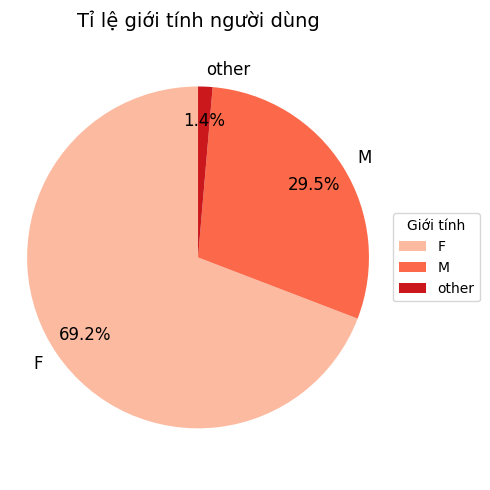

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = user_info['sex'].value_counts(dropna=False)

colors = sns.color_palette("Reds", n_colors=len(counts))

fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12},
    pctdistance=0.8,
    labeldistance=1.1
)

ax.legend(wedges, counts.index.astype(str), title="Sex", loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_title("Gender Percentage", fontsize=14)
ax.axis('equal')
plt.tight_layout()
plt.show()


- Total number of purchases by gender


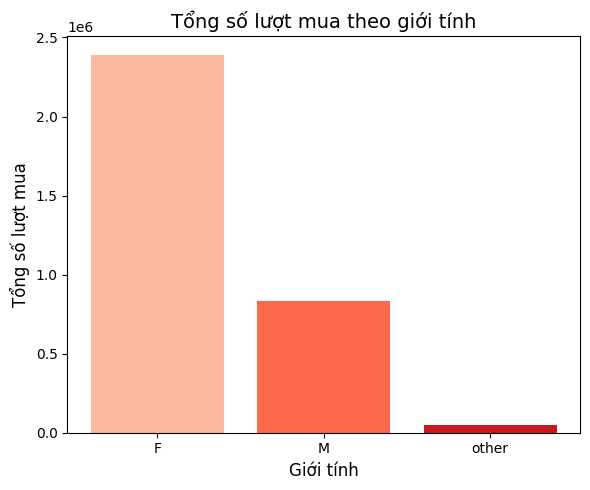

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

purchase_by_sex = user_behavior.groupby('sex')['num_purchases'].sum().sort_index()

colors = sns.color_palette("Reds", n_colors=len(purchase_by_sex))

plt.figure(figsize=(6, 5))
bars = plt.bar(purchase_by_sex.index.astype(str), purchase_by_sex.values, color=colors)

# Thêm nhãn
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Sum of purchases", fontsize=12)
plt.title("Total number of purchases by gender", fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


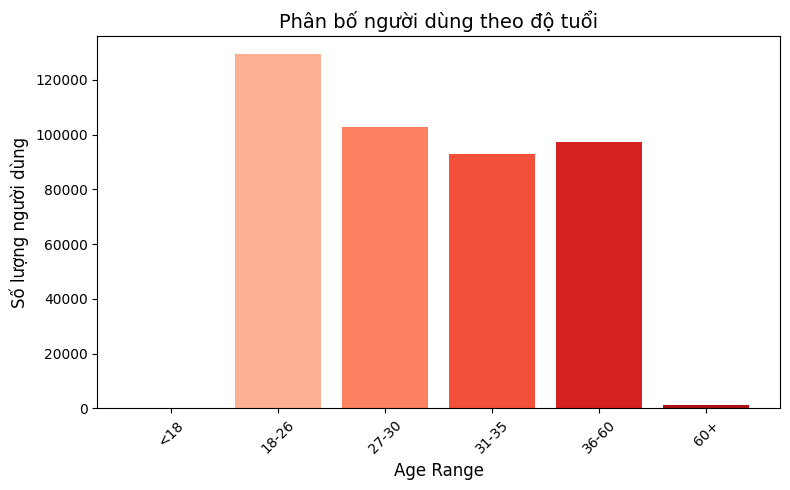

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

age_counts = user_info['age_range'].value_counts().sort_index()
colors = sns.color_palette("Reds", n_colors=len(age_counts))

plt.figure(figsize=(8, 5))
bars = plt.bar(age_counts.index, age_counts.values, color=colors)

plt.xlabel("Age Range", fontsize=12)
plt.ylabel("Num of Users", fontsize=12)
plt.title("Distribution of users by age", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


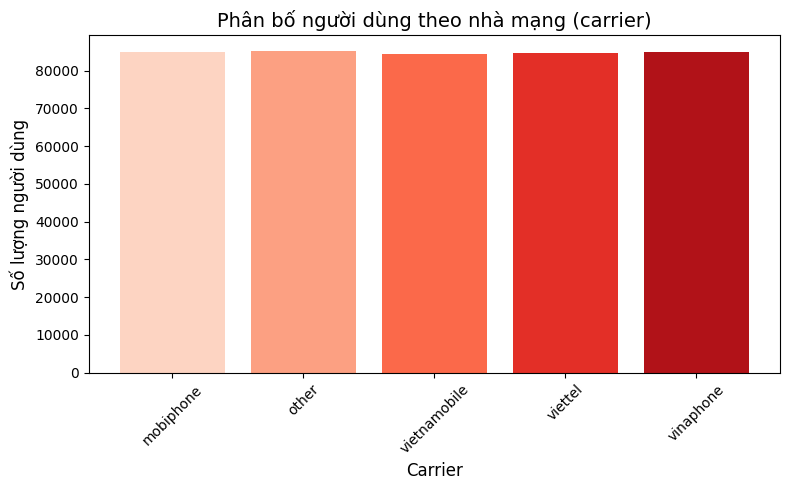

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

carrier_counts = user_info['carrier'].value_counts().sort_index()

colors = sns.color_palette("Reds", n_colors=len(carrier_counts))

plt.figure(figsize=(8, 5))
bars = plt.bar(carrier_counts.index, carrier_counts.values, color=colors)

plt.xlabel("Carrier", fontsize=12)
plt.ylabel("Num of users", fontsize=12)
plt.title("Distribution of users by carrier", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


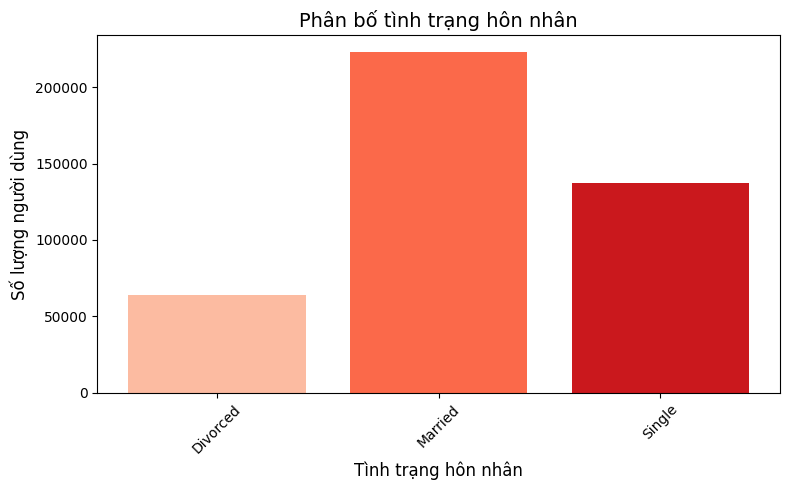

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

carrier_counts = user_info['marital_status'].value_counts().sort_index()

colors = sns.color_palette("Reds", n_colors=len(carrier_counts))

plt.figure(figsize=(8, 5))
bars = plt.bar(carrier_counts.index, carrier_counts.values, color=colors)

plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("Num of users", fontsize=12)
plt.title("Distribution of Marital Status", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Create a column for total actions
- Total number of actions by age_range

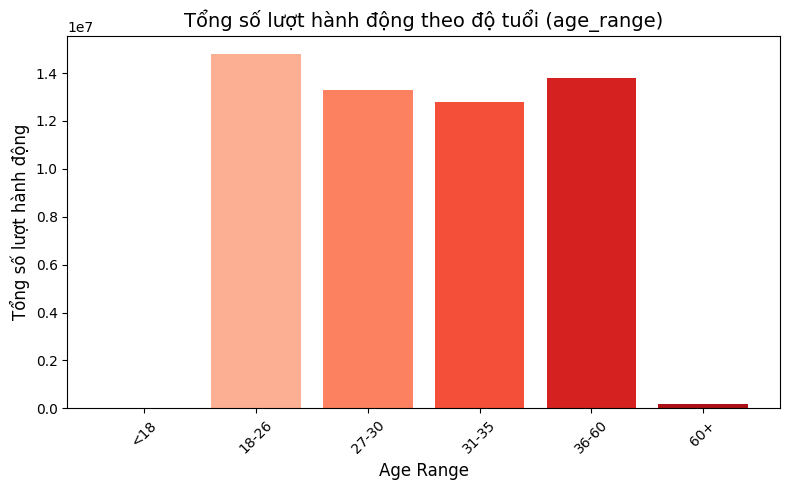

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

user_behavior['action'] = (
    user_behavior['num_add_to_cart'] + 
    user_behavior['num_clicks'] + 
    user_behavior['num_favourites'] + 
    user_behavior['num_purchases']
)

action_by_age = user_behavior.groupby('age_range')['action'].sum().sort_index()

colors = sns.color_palette("Reds", n_colors=len(action_by_age))

plt.figure(figsize=(8,5))
bars = plt.bar(action_by_age.index, action_by_age.values, color=colors)

plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Total actions', fontsize=12)
plt.title('Total number of actions by age_range', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Multivariate

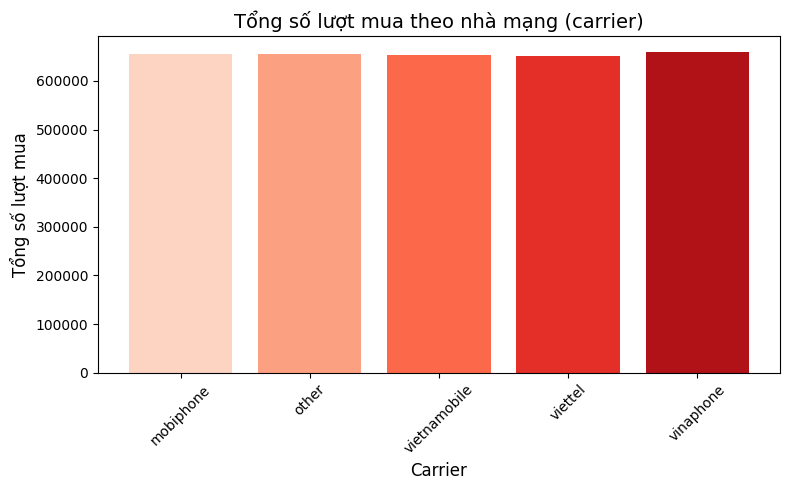

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

carrier_purchases = user_behavior.groupby('carrier')['num_purchases'].sum().sort_index()

colors = sns.color_palette("Reds", n_colors=len(carrier_purchases))

plt.figure(figsize=(8, 5))
plt.bar(carrier_purchases.index.astype(str), carrier_purchases.values, color=colors)

plt.xlabel("Carrier", fontsize=12)
plt.ylabel("Tổng số lượt mua", fontsize=12)
plt.title("Tổng số lượt mua theo nhà mạng (carrier)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:

purchase = user_log[user_log.action == 'purchase']
purchase_count = purchase.groupby('datetime').size().reset_index(name='count')
purchase_count = purchase_count.sort_values('datetime')

In [50]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
purchase_day_of_week = purchase.groupby('Day_of_Week').size().reset_index(name='count')
# used for ordinal data where the order matters
purchase_day_of_week['Day_of_Week'] = pd.Categorical(purchase_day_of_week['Day_of_Week'], categories=days_order, ordered=True)
purchase_day_of_week = purchase_day_of_week.sort_values('Day_of_Week')
purchase_day_of_week

,Day_of_Week,count
1,Monday,1561222
5,Tuesday,301505
6,Wednesday,328992
4,Thursday,299829
0,Friday,280995
2,Saturday,246332
3,Sunday,258833



- Group by month and calculate the total number of purchases each month

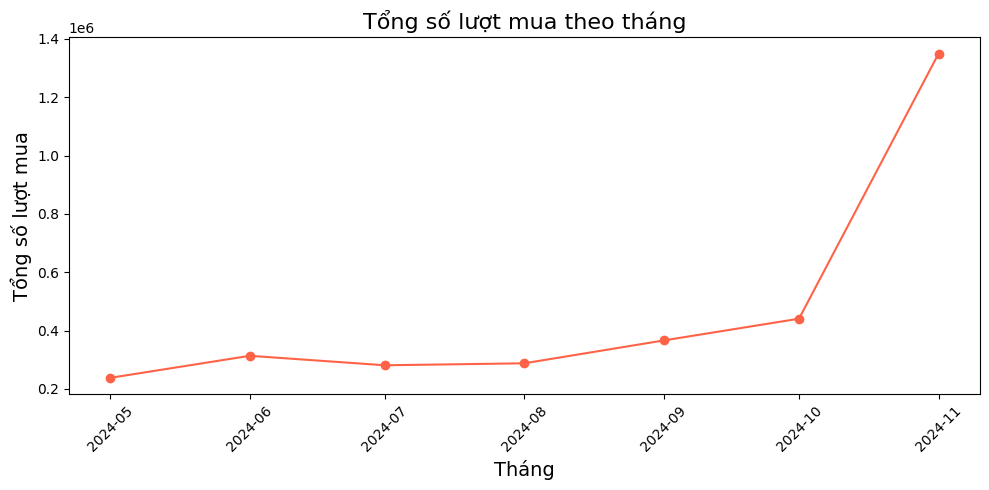

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

purchase_monthly = purchase_count.groupby(purchase_count['datetime'].dt.to_period('M')).agg({'count': 'sum'}).reset_index()
purchase_monthly['datetime'] = purchase_monthly['datetime'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
plt.plot(purchase_monthly['datetime'], purchase_monthly['count'], marker='o', color='tomato')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sum of Purchases', fontsize=14)
plt.title('Calculate the total number of purchases per month', fontsize=16)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()


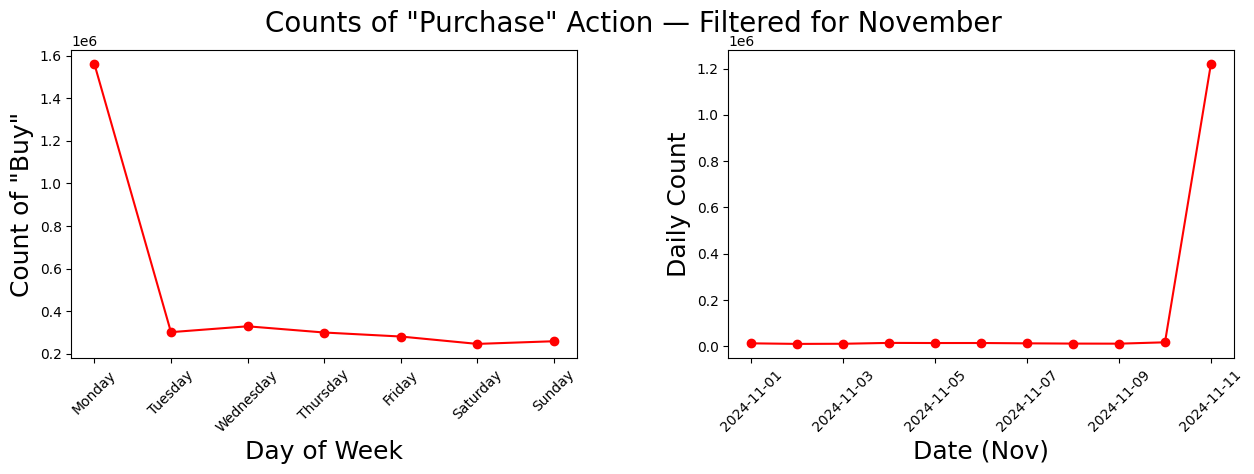

In [ ]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

november = purchase_count[purchase_count['datetime'].dt.month == 11]

ax1.plot(purchase_day_of_week['Day_of_Week'], purchase_day_of_week['count'], color='red', marker='o')
ax1.set_xlabel('Day of Week', fontsize=18)
ax1.set_ylabel('Count of "Buy"', fontsize=18)
ax1.tick_params(axis='x', rotation=45)

ax2.plot(november['datetime'], november['count'], color='red', marker='o')
ax2.set_xlabel('Date (Nov)', fontsize=18)
ax2.set_ylabel('Daily Count', fontsize=18)
ax2.tick_params(axis='x', rotation=45)

f.suptitle('Counts of "Purchase" Action — Filtered for November', fontsize=20)
plt.subplots_adjust(wspace=0.3)
plt.savefig('Purchase_Count_November.png', format='png', bbox_inches='tight')
plt.show()


In [ ]:

top_purchase_days = purchase_count.sort_values(by='count', ascending=False)
top_purchase_days.head(10)


,datetime,count
184,2024-11-11,1220285
121,2024-09-09,30844
46,2024-06-26,26450
37,2024-06-17,25573
163,2024-10-21,20081
137,2024-09-25,19001
160,2024-10-18,18137
158,2024-10-16,17703
183,2024-11-10,17175
159,2024-10-17,16950


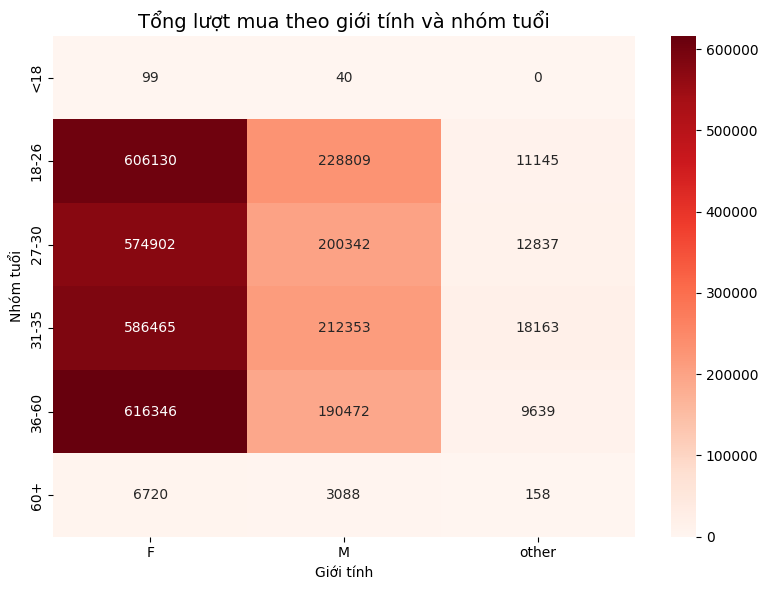

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


heat_data = user_behavior.pivot_table(
    index='age_range',
    columns='sex',
    values='num_purchases',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(8, 6))
sns.heatmap(heat_data, annot=True, fmt=".0f", cmap="Reds")
plt.title("Tổng lượt mua theo giới tính và nhóm tuổi", fontsize=14)
plt.xlabel("Giới tính")
plt.ylabel("Nhóm tuổi")
plt.tight_layout()
plt.show()

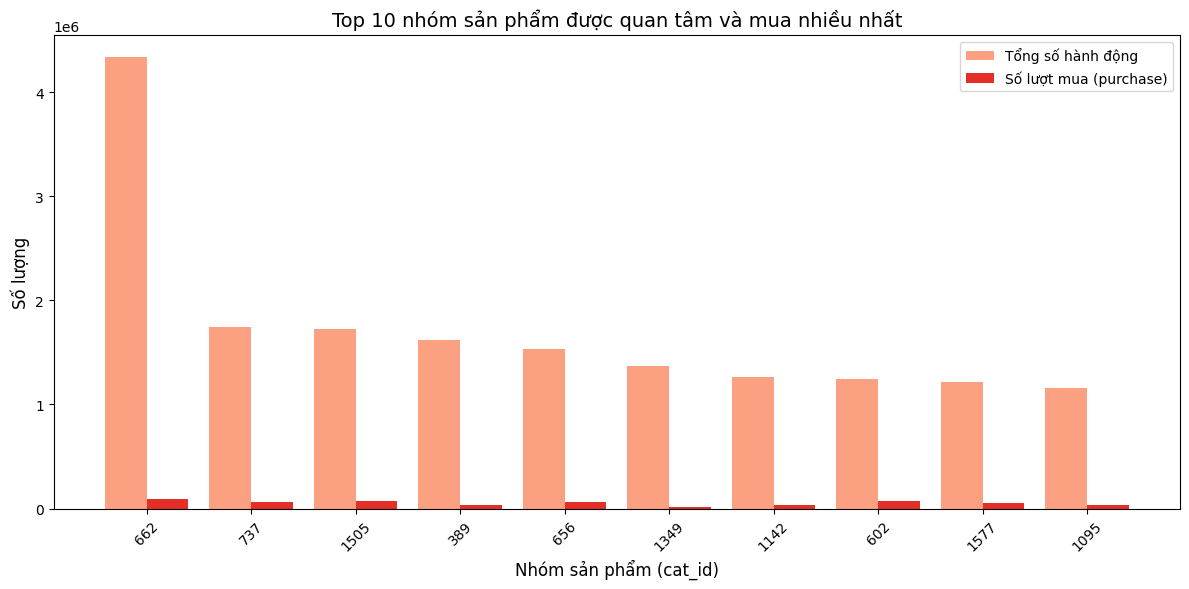

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total number of actions (all) by product category (cat_id)
total_actions = user_log.groupby('cat_id').size().reset_index(name='total_actions')

# Total number of purchases by product category (cat_id)
purchase_counts = user_log[user_log['action'] == 'purchase'].groupby('cat_id').size().reset_index(name='purchase_counts')

# Merge the two dataframes
agg_data = total_actions.merge(purchase_counts, on='cat_id', how='left')
agg_data['purchase_counts'] = agg_data['purchase_counts'].fillna(0)

# Sort by total actions
agg_data = agg_data.sort_values(by='total_actions', ascending=False)

# Select top 10 product categories
top_10 = agg_data.head(10)

# Create a red color palette from light to dark for the two bars
colors = sns.color_palette("Reds", 2)

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))

bar_width = 0.4
indices = range(len(top_10))

plt.bar(indices, top_10['total_actions'], width=bar_width, label='Total Actions', color=colors[0])
plt.bar([i + bar_width for i in indices], top_10['purchase_counts'], width=bar_width, label='Number of Purchases', color=colors[1])

plt.xlabel('Product Category (cat_id)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 10 Most Viewed and Purchased Product Categories', fontsize=14)
plt.xticks([i + bar_width / 2 for i in indices], top_10['cat_id'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

- Filter the user_log dataframe for product category 662 and purchases only.

- Merge with user_info dataframe to get users' gender.

- Group by gender to count the number of purchases.

- Plot a bar chart showing purchase counts by gender.

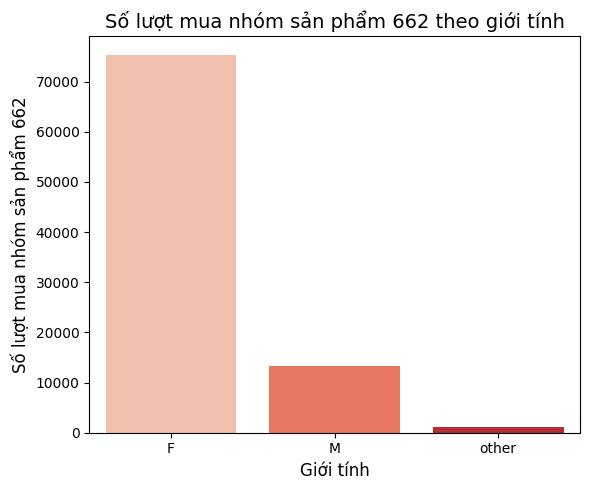

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

purchase_662 = user_log[(user_log['cat_id'] == 662) & (user_log['action'] == 'purchase')]

purchase_662 = purchase_662.merge(user_info[['user_id', 'sex']], on='user_id', how='left')

gender_purchase_counts = purchase_662.groupby('sex').size().reset_index(name='purchase_counts')

plt.figure(figsize=(6, 5))
colors = sns.color_palette("Reds", n_colors=len(gender_purchase_counts))

sns.barplot(data=gender_purchase_counts, x='sex', y='purchase_counts', palette=colors)

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of purchases for product category 662', fontsize=12)
plt.title('Number of purchases for product category 662 by gender', fontsize=14)
plt.tight_layout()
plt.show()


In [97]:
import pandas as pd

# Ensure 'datetime' column is in datetime format
user_log['datetime'] = pd.to_datetime(user_log['datetime'])

# Create a 'year_month' column
user_log['year_month'] = user_log['datetime'].dt.to_period('M')

# Filter rows where action is 'purchase'
purchase_logs = user_log[user_log['action'] == 'purchase']

# Calculate total number of unique months in the data
total_months = purchase_logs['year_month'].nunique()

# Count the number of unique months each user made a purchase
user_month_counts = purchase_logs.groupby('user_id')['year_month'].nunique().reset_index()
user_month_counts.rename(columns={'year_month': 'num_purchase_months'}, inplace=True)

# Filter users who purchased in all months
loyal_buyers = user_month_counts[user_month_counts['num_purchase_months'] == total_months]

# Result: Number of users who purchased continuously throughout the entire period
print("Number of users who purchased throughout the entire period:", len(loyal_buyers))


Number of users who purchased throughout the entire period: 10846


This code calculates the recency metric for each user based on their purchase history. First, it converts the datetime column to a proper datetime format and filters the data to keep only purchase actions. Then, it finds the most recent purchase date for each user by grouping their purchase records and selecting the maximum date. The overall latest purchase date in the dataset is used as a reference point. Finally, the code computes the recency value for each user by calculating the number of days between their last purchase and this reference date. This recency metric indicates how recently each user made a purchase, with lower values meaning more recent activity.

In [ ]:
import pandas as pd

user_log['datetime'] = pd.to_datetime(user_log['datetime'])

buy_logs = user_log[user_log['action'] == 'purchase']

recency = buy_logs.groupby('user_id', as_index=False)['datetime'].max()
recency.columns = ['user_id', 'last_purchase_date']

current_date = buy_logs['datetime'].max()

recency['Recency'] = recency['last_purchase_date'].apply(lambda x: (current_date - x).days)

recency.head()


,user_id,last_purchase_date,Recency
0,1,2024-11-11,0
1,2,2024-11-11,0
2,3,2024-11-11,0
3,4,2024-11-11,0
4,5,2024-11-11,0


In [80]:
recency

,user_id,last_purchase_date,Recency
0,1,2024-11-11,0
1,2,2024-11-11,0
2,3,2024-11-11,0
3,4,2024-11-11,0
4,5,2024-11-11,0
...,...,...,...
424119,424166,2024-11-11,0
424120,424167,2024-11-11,0
424121,424168,2024-11-11,0
424122,424169,2024-11-11,0


Filter user logs for purchase actions

Group by user_id and count purchases

Store counts as frequency per user

Display first few records

In [ ]:

purchase_log = user_log[user_log['action'] == 'purchase']

frequency_df = purchase_log.groupby('user_id').size().reset_index(name='frequency')
print(frequency_df.head())

   user_id  frequency
0        1          6
1        2         14
2        3          4
3        4          1
4        5         12


In [82]:
user_behavior 

,user_id,sex,job,carrier,marital_status,age_range,num_add_to_cart,num_clicks,num_favourites,num_purchases,num_unique_items,num_unique_cats,num_unique_brands,num_unique_merchants,num_active_days,action,datetime,Recency,Frequency
0,376517,M,Thực tập sinh giáo dục,other,Married,36-60,0,73,1,5,39,17,20,20,6,79,2024-11-11,1,79
1,234512,F,unknown,vietnamobile,Married,36-60,0,47,2,7,29,18,20,21,7,56,2024-11-11,1,56
2,344532,F,DevOps Engineer,other,Married,36-60,0,64,19,8,54,25,21,20,7,91,2024-11-11,1,91
3,186135,F,Thực tập sinh giáo dục,vietnamobile,Married,36-60,0,193,5,2,21,11,10,11,5,200,2024-11-11,1,200
4,30230,F,DevOps Engineer,viettel,Married,36-60,0,29,0,3,24,13,14,14,5,32,2024-11-11,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424165,395814,M,Kiến trúc sư phần mềm,vinaphone,Married,18-26,0,61,3,1,40,6,20,20,2,65,2024-11-11,1,65
424166,245950,M,Tư vấn khách hàng,other,Divorced,27-30,0,27,0,6,14,11,6,5,2,33,2024-11-11,1,33
424167,208016,F,Trưởng phòng kinh doanh,viettel,Married,36-60,0,52,0,2,27,3,7,7,2,54,2024-11-11,1,54
424168,272535,M,Dược sĩ,vinaphone,Married,36-60,0,35,0,3,16,7,13,13,2,38,2024-11-11,1,38


In [ ]:

user_metrics = recency.merge(frequency_df, on='user_id', how='outer')

user_behavior = user_behavior.merge(user_metrics, on='user_id', how='left')


In [94]:
user_behavior

,user_id,sex,job,carrier,marital_status,age_range,num_add_to_cart,num_clicks,num_favourites,num_purchases,num_unique_items,num_unique_cats,num_unique_brands,num_unique_merchants,num_active_days,action,datetime,last_purchase_date,Recency,frequency
0,376517,M,Thực tập sinh giáo dục,other,Married,36-60,0,73,1,5,39,17,20,20,6,79,2024-11-11,2024-11-11,0.0,5.0
1,234512,F,unknown,vietnamobile,Married,36-60,0,47,2,7,29,18,20,21,7,56,2024-11-11,2024-11-11,0.0,7.0
2,344532,F,DevOps Engineer,other,Married,36-60,0,64,19,8,54,25,21,20,7,91,2024-11-11,2024-11-11,0.0,8.0
3,186135,F,Thực tập sinh giáo dục,vietnamobile,Married,36-60,0,193,5,2,21,11,10,11,5,200,2024-11-11,2024-11-11,0.0,2.0
4,30230,F,DevOps Engineer,viettel,Married,36-60,0,29,0,3,24,13,14,14,5,32,2024-11-11,2024-11-11,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424165,395814,M,Kiến trúc sư phần mềm,vinaphone,Married,18-26,0,61,3,1,40,6,20,20,2,65,2024-11-11,2024-11-11,0.0,1.0
424166,245950,M,Tư vấn khách hàng,other,Divorced,27-30,0,27,0,6,14,11,6,5,2,33,2024-11-11,2024-11-11,0.0,6.0
424167,208016,F,Trưởng phòng kinh doanh,viettel,Married,36-60,0,52,0,2,27,3,7,7,2,54,2024-11-11,2024-11-11,0.0,2.0
424168,272535,M,Dược sĩ,vinaphone,Married,36-60,0,35,0,3,16,7,13,13,2,38,2024-11-11,2024-11-11,0.0,3.0


This code visualizes the total number of user interactions grouped by age range and sex using a bar chart. It sums the frequencies for each age-sex group, then plots these totals with clear labels and a legend for easy comparison.

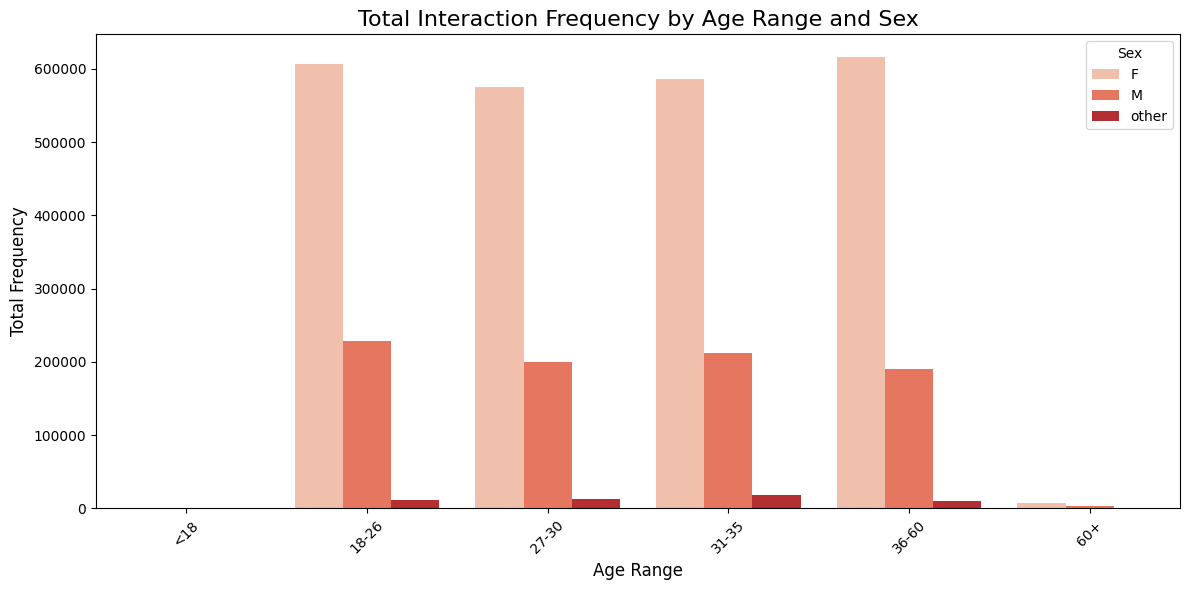

In [ ]:

freq_sum = user_behavior.groupby(['age_range', 'sex'])['frequency'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=freq_sum, x='age_range', y='frequency', hue='sex', palette='Reds')

plt.title('Total Interaction Frequency by Age Range and Sex', fontsize=16)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Total Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()